# Examples of using visualisation tools

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd

In [2]:
# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# make threshold
H = G.threshold(10)

In [3]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

## Network Measures Implementations with *GRAPHBundle*

In [5]:
bundleGraphs = scn.GraphBundle([H], ['Real Network'])

In [6]:
bundleGraphs

{'Real Network': <scona.classes.BrainNetwork at 0x7f356ecd6e10>}

In [7]:
# Note that 10 is not usually a sufficient number of random graphs to do meaningful analysis,
# it is used here for time considerations
bundleGraphs.create_random_graphs('Real Network', 10)

        Creating 10 random graphs - may take a little while


In [8]:
bundleGraphs

{'Real Network': <scona.classes.BrainNetwork at 0x7f356ecd6e10>,
 'Real Network_R0': <scona.classes.BrainNetwork at 0x7f356d3c12e8>,
 'Real Network_R1': <scona.classes.BrainNetwork at 0x7f356d327e48>,
 'Real Network_R2': <scona.classes.BrainNetwork at 0x7f356d327e80>,
 'Real Network_R3': <scona.classes.BrainNetwork at 0x7f356ee37fd0>,
 'Real Network_R4': <scona.classes.BrainNetwork at 0x7f356d3c1240>,
 'Real Network_R5': <scona.classes.BrainNetwork at 0x7f356d3c12b0>,
 'Real Network_R6': <scona.classes.BrainNetwork at 0x7f356d3c1128>,
 'Real Network_R7': <scona.classes.BrainNetwork at 0x7f356d3c1278>,
 'Real Network_R8': <scona.classes.BrainNetwork at 0x7f356d3c1320>,
 'Real Network_R9': <scona.classes.BrainNetwork at 0x7f356d3c1358>}

In [9]:
len(bundleGraphs)

11

### Input has been made - now function implementation

In [4]:
bundleGraphs_measures = bundleGraphs.report_global_measures()

NameError: name 'bundleGraphs' is not defined

In [ ]:
bundleGraphs_measures

In [ ]:
len(bundleGraphs_measures)

In [ ]:
# see the global measures of 1 Graph

bundleGraphs["Real Network"].graph["global_measures"]

In [ ]:
# could be usefule to check if GraPhBundle has global measures for each graph
# ну и не нужно, так как graph_measures/calculate_global_measure не будет считать если эти параметры уже есть

In [ ]:
bundleGraphs.keys()

In [ ]:
bundleGraphs['Real Network'].graph['global_measures']

In [ ]:
sorted_net_measures = sorted(bundleGraphs_measures.columns.values)

In [ ]:
sorted_net_measures

In [ ]:
real_network = "Real Network"

In [ ]:
list(bundleGraphs_measures.loc[real_network])

In [ ]:
bundleGraphs_measures.loc[real_network, 'assortativity']

In [ ]:
bundleGraphs["Real Network"]

In [ ]:
try:
    real_measures = bundleGraphs_measures.loc[real_network, 'assortativity']
except KeyError:
    raise KeyError("The name of the real Graph you passed to the function - \"{}\", does not exist in GraphBundle. Please provide a true name of real Graph (represented as a key in GraphBundle)".format(real_network))

In [ ]:
real_measures

In [ ]:
real_net_values = []
for i in sorted_net_measures:
    real_net_values.append(real_measures[i])

In [ ]:
real_net_values

In [ ]:
sorted_net_measures

** Now values of measures for random graphs **

In [ ]:
bundleGraphs_measures

In [ ]:
random_df = bundleGraphs_measures.drop(real_network)

In [ ]:
random_df

# Make Fucking Plot

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

In [ ]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

## Build the dataframe to later use for plotting

In [ ]:
bundleGraphs_measures = bundleGraphs.report_global_measures()

In [ ]:
bundleGraphs_measures

In [ ]:
sorted_network_measures = sorted(bundleGraphs_measures.columns.values)

In [ ]:
# get the sorted columns of dataframe 

sorted_network_measures

In [ ]:
# set abbreviations for measures
abbreviation = {'assortativity': 'a', 'average_clustering': 'C',
                'average_shortest_path_length': 'L',
                'efficiency': 'E', 'modularity': 'M'}

In [ ]:
# set columns for our new dataframe

new_columns = ["measure", "value", "TypeNetwork"]

In [ ]:
new_columns

In [ ]:
# set number of rows (indexes)

no_columns_old = len(bundleGraphs_measures.columns)
no_rows_old = len(bundleGraphs_measures.index)

total_rows = no_columns_old * no_rows_old

In [ ]:
total_rows

In [ ]:
index = [i for i in range(1, total_rows+1)]

In [ ]:
len(index)

In [ ]:
# now start redesigning the old dataframe

In [ ]:
real_network_name = "Real Network"

In [ ]:
bundleGraphs_measures

In [ ]:
data_array = list()

In [ ]:
data_array

In [ ]:
# 1) JUST THE REAL NETWORK STORE in THAT ARRAY

In [ ]:
for i in bundleGraphs_measures.columns:
    
    value = bundleGraphs_measures.loc[real_network_name, i]    # the name of the real network, and column name
    measure = abbreviation[i]                                  # get the abbreviation for measure and use this abb
    TypeNetwork = "Real Network"
    
    tmp = [measure, value, TypeNetwork]
    
    data_array.append(tmp)

In [ ]:
bundleGraphs_measures["assortativity"]["Real Network"]

In [ ]:
bundleGraphs_measures.loc["Real Network", "assortativity"]

In [ ]:
tmp

In [ ]:
data_array

In [ ]:
# 2) AND NOW FOR THE RANDOM NETWORKs AND STORE in THAT ARRAY

In [ ]:
# drop real network and make dataframe of only random networks

random_df = bundleGraphs_measures.drop(real_network_name)

In [ ]:
random_df

In [ ]:
rand_array = []

In [ ]:
rand_array

In [ ]:
for measure in random_df.columns:
    for rand_graph in random_df.index:
        value = random_df[measure][rand_graph]
        measure_short = abbreviation[measure]
        TypeNetwork = "Random Network"
        
        tmp = [measure_short, value, TypeNetwork]
        
        data_array.append(tmp)

In [128]:
random_df.columns

Index(['assortativity', 'average_clustering', 'average_shortest_path_length',
       'efficiency', 'modularity'],
      dtype='object')

In [129]:
random_df.index

Index(['Real Network_R0', 'Real Network_R1', 'Real Network_R2',
       'Real Network_R3', 'Real Network_R4', 'Real Network_R5',
       'Real Network_R6', 'Real Network_R7', 'Real Network_R8',
       'Real Network_R9'],
      dtype='object')

In [ ]:
data_array

In [ ]:
len(data_array)

In [ ]:
# total array
data = data_array + rand_array

In [ ]:
data

In [ ]:
len(data)

In [ ]:
NewDataFrame = pd.DataFrame(data=data_array, index=index, columns=new_columns)

In [ ]:
NewDataFrame

In [ ]:
bundleGraphs_measures

In [131]:
small_worlds = bundleGraphs.report_small_world("Real Network")

In [133]:
small_worlds

{'Real Network': 1.0,
 'Real Network_R0': 1.6565957947535912,
 'Real Network_R1': 1.650735119721434,
 'Real Network_R2': 1.7635001523458032,
 'Real Network_R3': 1.760155578596434,
 'Real Network_R4': 1.709162790297258,
 'Real Network_R5': 1.7640603642845916,
 'Real Network_R6': 1.821642854899903,
 'Real Network_R7': 1.705754346325304,
 'Real Network_R8': 1.7517894829659157,
 'Real Network_R9': 1.7183823244651244}

In [134]:
list(small_worlds.values())

[1.0,
 1.6565957947535912,
 1.650735119721434,
 1.7635001523458032,
 1.760155578596434,
 1.709162790297258,
 1.7640603642845916,
 1.821642854899903,
 1.705754346325304,
 1.7517894829659157,
 1.7183823244651244]

In [136]:
len(bundleGraphs)

11

In [ ]:
columns = ["a", "b", "c"]

In [ ]:
index = [1,2,3]

In [ ]:
data = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [ ]:
data

In [ ]:
ll = [[11,12,13], [14,15,16], [17,18,19]]

In [ ]:
test = pd.DataFrame(ll, index=index, columns=columns)

In [ ]:
test

In [ ]:
sns.set(style="white")
sns.set_context("poster", font_scale=1)

In [ ]:
color = [sns.color_palette()[0], "lightgrey"]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x="measure", y="value", hue="TypeNetwork", data=NewDataFrame, 
                 palette=[color[0],color[1]], ci="sd")

# make a line at y=0
ax.axhline(0, linewidth=0.8, color='black')

# set labels for y axix
ax.set_ylabel("Global network measures")
ax.set_xlabel("")

# create a legend
ax.legend(fontsize="xx-small")

# remove the top and right spines from plot
sns.despine()

# adjust subplot params so that the subplot fits in to the figure area
plt.tight_layout()

#### Small World

In [138]:
small_worlds

{'Real Network': 1.0,
 'Real Network_R0': 1.6565957947535912,
 'Real Network_R1': 1.650735119721434,
 'Real Network_R2': 1.7635001523458032,
 'Real Network_R3': 1.760155578596434,
 'Real Network_R4': 1.709162790297258,
 'Real Network_R5': 1.7640603642845916,
 'Real Network_R6': 1.821642854899903,
 'Real Network_R7': 1.705754346325304,
 'Real Network_R8': 1.7517894829659157,
 'Real Network_R9': 1.7183823244651244}

In [150]:
NewSmallDataFrame = NewDataFrame.copy()

In [ ]:
NewSmallDataFrame.append(aaa, ignore_index=True)

In [93]:
aaa = {'measure' : 'sigma' , 'value' : 1.6565957947535912, 'TypeNetwork': "Real Network"}

In [94]:
aaa

{'TypeNetwork': 'Real Network',
 'measure': 'sigma',
 'value': 1.6565957947535912}

In [95]:
bbb = [{'measure' : 'sigma' , 'value' : 1.6565957947535912, 'TypeNetwork': "Real Network"}, 
       {'measure' : 'sigma' , 'value' : 1.650735119721434, 'TypeNetwork': "Real Network"}]

In [96]:
bbb

[{'TypeNetwork': 'Real Network',
  'measure': 'sigma',
  'value': 1.6565957947535912},
 {'TypeNetwork': 'Real Network',
  'measure': 'sigma',
  'value': 1.650735119721434}]

In [ ]:
NewSmallDataFrame.append(bbb, ignore_index=True)

In [139]:
del small_worlds["Real Network"]

In [140]:
small_worlds

{'Real Network_R0': 1.6565957947535912,
 'Real Network_R1': 1.650735119721434,
 'Real Network_R2': 1.7635001523458032,
 'Real Network_R3': 1.760155578596434,
 'Real Network_R4': 1.709162790297258,
 'Real Network_R5': 1.7640603642845916,
 'Real Network_R6': 1.821642854899903,
 'Real Network_R7': 1.705754346325304,
 'Real Network_R8': 1.7517894829659157,
 'Real Network_R9': 1.7183823244651244}

In [151]:
df_small_world = []

for i in list(small_worlds.values()):
    aaa = {'measure' : 'sigma' , 'value' : i, 'TypeNetwork': "Real Network"}
        
    df_small_world.append(aaa)

In [155]:
NewSmallDataFrame = NewDataFrame.append(df_small_world, ignore_index=True)

In [156]:
NewSmallDataFrame

,measure,value,TypeNetwork
0,a,0.090769,Real Network
1,C,0.449889,Real Network
2,L,2.376243,Real Network
3,E,0.479840,Real Network
4,M,0.382855,Real Network
5,a,-0.057194,Random Network
6,a,-0.092502,Random Network
7,a,-0.055859,Random Network
8,a,-0.079702,Random Network
9,a,-0.077677,Random Network


In [119]:
SigmaRandom = [{'TypeNetwork': 'Random Network',
  'measure': 'sigma',
  'value': 1},
 {'TypeNetwork': 'Random Network',
  'measure': 'sigma',
  'value': 1},
 {'TypeNetwork': 'Random Network',
  'measure': 'sigma',
  'value': 1},
 {'TypeNetwork': 'Random Network',
  'measure': 'sigma',
  'value': 1},
 {'TypeNetwork': 'Random Network',
  'measure': 'sigma',
  'value': 1},
 {'TypeNetwork': 'Random Network',
  'measure': 'sigma',
  'value': 1},
 {'TypeNetwork': 'Random Network',
  'measure': 'sigma',
  'value': 1},
 {'TypeNetwork': 'Random Network',
  'measure': 'sigma',
  'value': 1},
 {'TypeNetwork': 'Random Network',
  'measure': 'sigma',
  'value': 1},
 {'TypeNetwork': 'Random Network',
  'measure': 'sigma',
  'value': 1}]

In [120]:
SigmaRandom

[{'TypeNetwork': 'Random Network', 'measure': 'sigma', 'value': 1},
 {'TypeNetwork': 'Random Network', 'measure': 'sigma', 'value': 1},
 {'TypeNetwork': 'Random Network', 'measure': 'sigma', 'value': 1},
 {'TypeNetwork': 'Random Network', 'measure': 'sigma', 'value': 1},
 {'TypeNetwork': 'Random Network', 'measure': 'sigma', 'value': 1},
 {'TypeNetwork': 'Random Network', 'measure': 'sigma', 'value': 1},
 {'TypeNetwork': 'Random Network', 'measure': 'sigma', 'value': 1},
 {'TypeNetwork': 'Random Network', 'measure': 'sigma', 'value': 1},
 {'TypeNetwork': 'Random Network', 'measure': 'sigma', 'value': 1},
 {'TypeNetwork': 'Random Network', 'measure': 'sigma', 'value': 1}]

In [125]:
NewSmallDataFrame = NewSmallDataFrame.append(SigmaRandom, ignore_index=True)

In [158]:
tmp = {'measure': 'sigma', 'value': 1, 'TypeNetwork': 'Random Network'}

In [159]:
NewSmallDataFrame = NewSmallDataFrame.append(tmp, ignore_index=True)

In [160]:
NewSmallDataFrame

,measure,value,TypeNetwork
0,a,0.090769,Real Network
1,C,0.449889,Real Network
2,L,2.376243,Real Network
3,E,0.479840,Real Network
4,M,0.382855,Real Network
5,a,-0.057194,Random Network
6,a,-0.092502,Random Network
7,a,-0.055859,Random Network
8,a,-0.079702,Random Network
9,a,-0.077677,Random Network


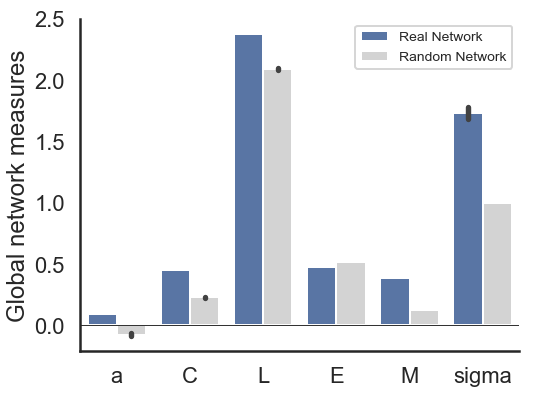

In [161]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x="measure", y="value", hue="TypeNetwork", data=NewSmallDataFrame, 
                 palette=[color[0],color[1]], ci="sd")

# make a line at y=0
ax.axhline(0, linewidth=0.8, color='black')

# set labels for y axix
ax.set_ylabel("Global network measures")
ax.set_xlabel("")

# create a legend
ax.legend(fontsize="xx-small")

# remove the top and right spines from plot
sns.despine()

# adjust subplot params so that the subplot fits in to the figure area
plt.tight_layout()

# TEST how the fuction is WORKING

In [ ]:
import importlib.util
spec = importlib.util.spec_from_file_location("plot_network_measures", "/home/pilot/GSoC/scona/scona/test.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

In [ ]:
%%time
print("10 random graphs")
foo.plot_network_measures(bundleGraphs,real_network='Real Network')

In [ ]:
%%time
print("1000 random graphs")
foo.plot_network_measures(test,real_network='Real Network')

In [ ]:
test = scn.GraphBundle([H], ['Real Network'])

In [ ]:
test

In [ ]:
test.create_random_graphs("Real Network", 1000)

In [ ]:
bundleGraphs = scn.GraphBundle([H], ['Real Network'])

In [ ]:
bundleGraphs

In [ ]:
%%time
bundleGraphs.create_random_graphs("Real Network", 100)

In [ ]:
%%time
bundleGraphs_measures = bundleGraphs.report_global_measures()

In [ ]:
len(bundleGraphs)

In [ ]:
%%time
print("100 random graphs")
foo.plot_network_measures(bundleGraphs,real_network='Real Network')

In [ ]:
fig, axxx = plt.subplots(1, 1)
axxx = foo.plot_network_measures(bundleGraphs,real_network='Real Network')

Understanding error bars

In [ ]:
test = np.array(random_df["assortativity"])

In [ ]:
test

In [ ]:
# Calculate the mean
test_mean = np.mean(test)

In [ ]:
test_mean

In [ ]:
# Calculate the standard deviation
test_std = np.std(test)

In [ ]:
test_std

In [ ]:
test_std = 0.01

In [ ]:
fig, ax = plt.subplots()

ax.bar(1, test_mean, yerr=test_std, align='center',capsize=10)


In [ ]:
#### standard deviation is a measure of the spread of a set of data away from the mean of the data.

In [ ]:
# with CI ---  0.60*SD to 2.87*SD
error_down = 0.6 * test_std
error_up = 2.87 * test_std

In [ ]:
error_down

In [ ]:
error_up

In [ ]:
llist = [error_down, error_up]

In [ ]:
llist

In [ ]:
up = [1,2,3,4,5]

In [ ]:
down = [9,8,7,6,5]

In [ ]:
test = np.array([down, up])

In [ ]:
test

In [ ]:
aaa = np.array([[error_down], [error_up]])

In [ ]:
aaa

In [ ]:
fig, ax = plt.subplots()

ax.bar(1, test_mean, yerr=aaa, align='center',capsize=10)

In [ ]:
bundleGraphs_measures[bundleGraphs_measures.columns[0]]

In [ ]:
bundleGraphs_measures[bundleGraphs_measures.columns[0]].std()

In [ ]:
ci = stats.norm.ppf((1+0.95)/2, scale=np.std(bundleGraphs_measures[bundleGraphs_measures.columns[0]]))

In [ ]:
ci

-----------------------------------------------------------------------

## Network Measures [OLD]

### Plot network measures - reference to scripts/make_figures/plot_network_measures

In [ ]:
def plot_network_measures(network_measures):
    """
    Create a plot of the network measures
    
    Parameters
    ----------
    network_measures : dict
        could be obtained from running the graph_measures/calculate_global_measures()

    Returns
    -------
    plot
        an awesome viz

    """
    pass
    
    
    

In [ ]:
# get input
from scona.graph_measures import calculate_global_measures

In [ ]:
network_measures = calculate_global_measures(G)

In [ ]:
network_measures

In [ ]:
# Set the aesthetic style of the plot
sns.set_style("white")

In [ ]:
# Set the plotting context parameter - scaling plot elements
sns.set_context("talk")

In [ ]:
# do not plot the measure, which equals to nan !!! raise Warning like - MAN thie measure equals to Nan
del network_measures["assortativity"]

In [ ]:
network_measures

In [ ]:
measures = list(network_measures.keys())
values = list(network_measures.values())

In [ ]:
measures

In [ ]:
values

## Attempt 1 - Create a viz from dataframe - RESULT - Nothing Special - Use matplotlib

In [ ]:
network_measures

In [ ]:
dict_pd = {"Measures":measures,"Values":values}

In [ ]:
df = pd.DataFrame(dict_pd)

In [ ]:
df.set_index('Measures', inplace=True)

In [ ]:
df.plot(kind='bar', figsize=(10, 6))

## Attempt 2 - Understand Kirsties code

def plot_network_measures(measure_dict, ax=None, figure_name=None, y_max=2.5,
                          y_min=-0.5, color=sns.color_palette()[0]):

In [ ]:
network_measures

In [ ]:
random_network_measures = {'average_clustering_rand': 0.89, 'average_shortest_path_length_rand': 1.3, 'efficiency_rand': 0.95}

In [ ]:
random_network_measures

In [ ]:
dict_pd2 = {"Measures":measures+list(random_network_measures.keys()),"Values":values+list(random_network_measures.values())}

In [ ]:
df2 = pd.DataFrame(dict_pd2)

In [ ]:
df2

# Fucked Up - Make by myself

## Attempt 3 - My fucking Viz with matplotlib

**plot_network_measures**
* input:
    - network_measures
    - network_measures_rand
* output:
    - plot the fig
    - save to file

First we will create a figure object called fig and an axis object in that figure called ax using matplotlib's plt.subplots() function. Everything in our plot will be added to the ax (axis) object. Next we put a bar chart on our ax (axis) with the ax.bar() method.
 * fig, ax = plt.subplots()

In [ ]:
network_measures = {'average_clustering': 1.0, 'average_shortest_path_length': 1.0, 'assortativity': 1.0, 'modularity': 1.0, 'efficiency': 1.0}

In [ ]:
network_measures

In [ ]:
random_network_measures = {'average_clustering': 0.89, 'average_shortest_path_length': 1.3,'assortativity': 0.65, 'modularity': 1, 'efficiency': 2}

In [ ]:
random_network_measures

In [ ]:
measures_network = list(network_measures.keys())
values_network = list(network_measures.values())

In [ ]:
random_measures_network = list(random_network_measures.keys())
random_values_network = list(random_network_measures.values())

In [ ]:
# keys Sunchronizeid
print(measures_network)
print(random_measures_network)

In [ ]:
# Set position of bar on X axis
barWidth = 0.2
r1 = np.arange(len(values_network))
r2 = [x + barWidth + 0.05 for x in r1]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(r1, values_network, color='#2cb8ee', width=barWidth, edgecolor='white', label='Real Network')
rects2 = ax.bar(r2, random_values_network, color='#cdc6c0', width=barWidth, edgecolor='white', label='Random Network')

ax.set_xticks([r + barWidth for r in range(len(r1))])
ax.set_xticklabels(["C", "L", "a", "M", "E"])
ax.set_xlabel("Network Measures", fontweight='bold')
ax.set_ylabel("Values", fontweight='bold')

autolabel(rects1)
autolabel(rects2)

ax.legend()

# save the figure
# fig.savefig("RuslanAAAAAAAAAAAA", bbox_inches=0, dpi=100)

In [ ]:
def autolabel(rects):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """
      
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),                                 # text - what to show
                    xy=(rect.get_x() + rect.get_width() / 2, height),    # (xy) coordinate where it should be
                    ha="center",                                         # ha - the position of text
                    va='bottom',                                         # va - make text slightly upper than bar
                    size=12)                                             # size - the size of the text

In [ ]:
# set seaborn styles
sns.set_style('white')
sns.set_context("poster", font_scale=2)

# to diable styles
# sns.reset_orig()

In [ ]:
#### Seaborn Styling
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(r1, values_network, color='#2cb8ee', width=barWidth, edgecolor='white', label='Real Network')
rects2 = ax.bar(r2, random_values_network, color='#cdc6c0', width=barWidth, edgecolor='white', label='Random Network')

ax.set_xticks([r + barWidth for r in range(len(r1))])
ax.set_xticklabels(["C", "L", "a", "M", "E"])



ax.set_ylabel("Network Measures")

autolabel(rects1)
autolabel(rects2)

# ax.legend()

# save the figure
# fig.savefig("RuslanAAAAAAAAAAAA", bbox_inches=0, dpi=100)

In [ ]:
# plt.bar(measures, values, label="Network Measures")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

In [ ]:
x = [1,2,3]

In [ ]:
plt.bar(x, values, align='center')
plt.xticks(x, measures, rotation='vertical')

In [ ]:
plt.bar(measures, values)

plt.ylim(0,3)
plt.ylabel ('Value')
plt.xlabel ('Measures Types')
plt.xticks(list(measures),rotation=30)

# Example 

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, no_movies)
    plt.xlabel('Genre', fontsize=5)
    plt.ylabel('No of Movies', fontsize=5)
    plt.xticks(index, label, fontsize=5, rotation=30)
    plt.title('Market Share for Each Genre 1995-2017')
    plt.show()

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

# Threshold G at cost 10 to create a binary graph with 10% as many edges as the complete graph G.
G10 = G.threshold(10)

# Create a GraphBundle object that contains the G10 graph called "real_graph"
bundleGraphs = scn.GraphBundle([G10], ["real_graph"])

# Add ten random graphs to this bundle
# (In real life you'd want more than 10 random graphs,
# but this step can take quite a long time to run so 
# for the demo we just create 10)
bundleGraphs.create_random_graphs("real_graph", 10)

        Creating 10 random graphs - may take a little while


In [4]:
from scona.visualisations import plot_network_measures

In [6]:
# Calculate the global measures
bundleGraphs_measures = bundleGraphs.report_global_measures()

# Show the dataframe so we can see the measures
display(bundleGraphs_measures)

,assortativity,average_clustering,average_shortest_path_length,efficiency,modularity
real_graph,0.090769,0.449889,2.376243,0.479840,0.382855
real_graph_R0,-0.068490,0.222020,2.089407,0.518880,0.132284
real_graph_R1,-0.087987,0.223699,2.084373,0.519606,0.121992
real_graph_R2,-0.086027,0.230896,2.085135,0.519445,0.120239
real_graph_R3,-0.070905,0.230183,2.088286,0.518846,0.127489
real_graph_R4,-0.081704,0.230800,2.083718,0.519641,0.128235
real_graph_R5,-0.084969,0.232425,2.088117,0.518922,0.131506
real_graph_R6,-0.062527,0.229273,2.098376,0.517527,0.122155
real_graph_R7,-0.099200,0.222425,2.086298,0.519278,0.122585
real_graph_R8,-0.074908,0.226588,2.085198,0.519338,0.130246


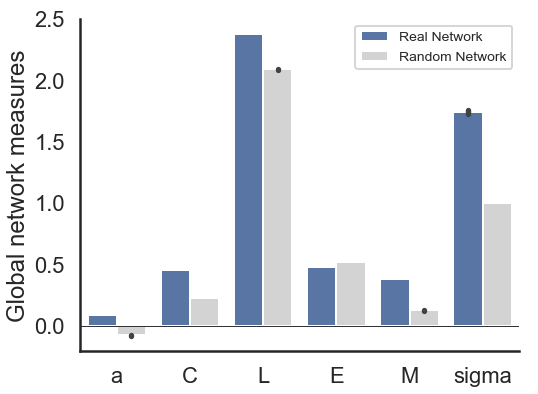

CPU times: user 694 ms, sys: 220 ms, total: 914 ms
Wall time: 448 ms


In [8]:
%%time

plot_network_measures(bundleGraphs, real_network="real_graph")

Fixing Bugs in SMALL WORLD

In [22]:
H.graph

{'centroids': True, 'global_measures': {}, 'parcellation': True}

In [23]:
H.graph["global_measures"]

{}

In [12]:
H.graph["global_measures"]["average_clustering"]

KeyError: 'average_clustering'

In [25]:
watts_strogatz_2 = nx.watts_strogatz_graph(6, 4, 0)

In [26]:
watts_strogatz_2.graph

{}

In [27]:
watts_strogatz_2.graph["global_measures"]

KeyError: 'global_measures'

In [28]:
watts_strogatz_2.graph["global_measures"]["average_clustering"]

KeyError: 'global_measures'

In [18]:
try:
    watts_strogatz_2.graph["global_measures"]["average_clustering"]
except KeyError:
    print("Alles hut")

Alles hut


In [19]:
R = G.threshold(10)

In [24]:
try:
    C_g = H.graph["global_measures"]["average_clustering"]
except KeyError:
    print ("No")
    C_g = nx.average_clustering(H)

No
